In [623]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [624]:
#import dataset
data = pd.read_csv('patients_data.csv')

In [625]:
data.shape

(27890, 21)

In [626]:
# data.columns

In [627]:
data.head()

,patient_number,p_id,state_patient_number,date_announced,age_bracket,gender,detected_city,detected_district,detected_state,state_code,...,type_of_transmission,contracted_from_which_patient_suspected,status_change_date,current_status,estimated_onset_date,source1,source2,source3,notes,backup_notes
0,1,P1,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,KL,...,Imported,NaN,14/02/2020,Recovered,NaN,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Travelled from Wuhan,Student from Wuhan
1,2,P2,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,...,Imported,NaN,14/02/2020,Recovered,NaN,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Travelled from Wuhan,Student from Wuhan
2,3,P3,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,...,Imported,NaN,14/02/2020,Recovered,NaN,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Travelled from Wuhan,Student from Wuhan
3,4,P4,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,...,Imported,NaN,15/03/2020,Recovered,NaN,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,"Travelled from Austria, Italy",Travel history to Italy and Austria
4,5,P5,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,TG,...,Imported,NaN,02/03/2020,Recovered,NaN,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travelled from Dubai to Bangalore on 20th Feb,...","Travel history to Dubai, Singapore contact"


In [628]:
#making another copy
df = data

In [629]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27890 entries, 0 to 27889
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   patient_number                           27890 non-null  int64  
 1   p_id                                     27890 non-null  object 
 2   state_patient_number                     2997 non-null   object 
 3   date_announced                           27890 non-null  object 
 4   age_bracket                              2346 non-null   object 
 5   gender                                   5313 non-null   object 
 6   detected_city                            2347 non-null   object 
 7   detected_district                        20251 non-null  object 
 8   detected_state                           27890 non-null  object 
 9   state_code                               27890 non-null  object 
 10  nationality                              2707 

In [630]:
df.isna().sum()

patient_number                                 0
p_id                                           0
state_patient_number                       24893
date_announced                                 0
age_bracket                                25544
gender                                     22577
detected_city                              25543
detected_district                           7639
detected_state                                 0
state_code                                     0
nationality                                25183
type_of_transmission                       24900
contracted_from_which_patient_suspected    26327
status_change_date                           110
current_status                                 0
estimated_onset_date                       27890
source1                                      384
source2                                    24017
source3                                    27438
notes                                       1335
backup_notes        

In [631]:
#dropping trivial columns
df = df.drop(["p_id","patient_number","state_patient_number","detected_state","source1","source2",
              "source3","notes","backup_notes"], axis = 1)

In [632]:
df.shape

(27890, 12)

In [633]:
index = df.isna().sum().index.tolist()

In [634]:
missing_data_info = pd.DataFrame(df.isna().sum(),columns=['No. of Missing Values'],index=index)

In [635]:
missing_data_info['Percentage'] = missing_data_info['No. of Missing Values']/df.shape[0]*100

In [636]:
missing_data_info

,No. of Missing Values,Percentage
date_announced,0,0.000000
age_bracket,25544,91.588383
gender,22577,80.950161
detected_city,25543,91.584797
detected_district,7639,27.389745
state_code,0,0.000000
nationality,25183,90.294012
type_of_transmission,24900,89.279312
contracted_from_which_patient_suspected,26327,94.395841
status_change_date,110,0.394407


In [637]:
data_with_age = df.drop(['contracted_from_which_patient_suspected','estimated_onset_date'],axis=1)

In [638]:
data_with_age.dropna(subset=['age_bracket'],axis=0,inplace=True)

In [639]:
#data_with_age.isna().sum()

In [640]:
data_with_age.dropna(how='all',axis=0,inplace=True)

In [641]:
data_with_age.dropna(thresh=9,axis=0,inplace=True)

In [642]:
data_with_age.isna().sum()

date_announced            0
age_bracket               0
gender                   38
detected_city           318
detected_district         0
state_code                0
nationality              88
type_of_transmission     19
status_change_date        2
current_status            0
dtype: int64

In [643]:
data_with_age.drop('detected_city',axis=1,inplace=True)

In [644]:
data_with_age.shape

(964, 9)

In [645]:
list(data_with_age.isna().sum()/data_with_age.shape[0])

[0.0,
 0.0,
 0.03941908713692946,
 0.0,
 0.0,
 0.0912863070539419,
 0.01970954356846473,
 0.002074688796680498,
 0.0]

In [646]:
cnt = 9 - data_with_age.apply(lambda x: x.count(),axis =1)

In [647]:
cnt.max()

1

In [648]:
data_with_age.drop('nationality',axis=1,inplace=True)

In [649]:
data_with_age = data_with_age.reset_index(drop=True)

### We see that the maximum number of null values in each row is 1

In [650]:
data_with_age.head()

,date_announced,age_bracket,gender,detected_district,state_code,type_of_transmission,status_change_date,current_status
0,30/01/2020,20,F,Thrissur,KL,Imported,14/02/2020,Recovered
1,02/03/2020,45,M,East Delhi,DL,Imported,15/03/2020,Recovered
2,02/03/2020,24,M,Hyderabad,TG,Imported,02/03/2020,Recovered
3,03/03/2020,69,M,Italians*,RJ,Imported,03/03/2020,Recovered
4,04/03/2020,55,NaN,Italians*,HR,Imported,29/03/2020,Recovered


## Changing Object to DateTime format

In [651]:
data_with_age['date_announced'] = pd.to_datetime(data_with_age['date_announced'])

In [652]:
data_with_age['status_change_date'] = pd.to_datetime(data_with_age['status_change_date'])

In [653]:
sns.set_style('whitegrid')
sns.set(font_scale=2)

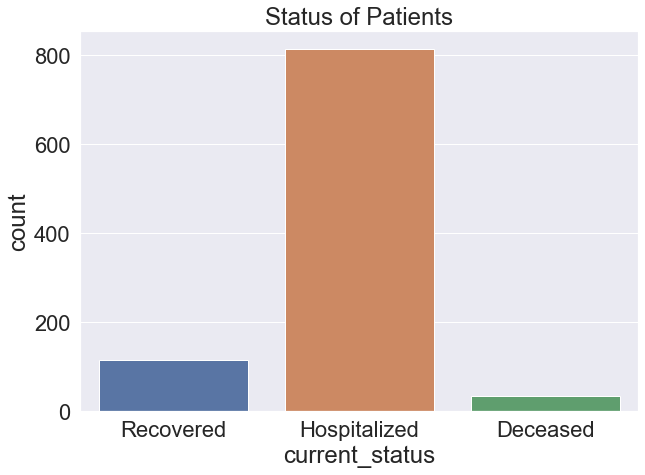

In [654]:
plt.figure(figsize=(10,7))
sns.countplot('current_status',data=data_with_age)
plt.title("Status of Patients")
plt.show()

In [655]:
data_with_age['age_bracket'].value_counts()

35    34
55    32
32    32
27    30
33    26
      ..
78     1
15     1
96     1
79     1
89     1
Name: age_bracket, Length: 86, dtype: int64

In [656]:
errors = []
for i in range(data_with_age.shape[0]):
    try:
        int(data_with_age.loc[i,'age_bracket'])
    except Exception:
        errors.append(i)
print(errors)

[444, 445, 446, 447, 946]


In [657]:
# data_with_age.loc[946,'age_bracket']

In [658]:
for i in errors:
    data_with_age.loc[i,'age_bracket'] = np.nan
data_with_age.dropna(subset=['age_bracket'],inplace=True)

In [659]:
# data_with_age['age_bracket'].isna().sum()

In [660]:
data_with_age['age_bracket'] = data_with_age['age_bracket'].astype(int)

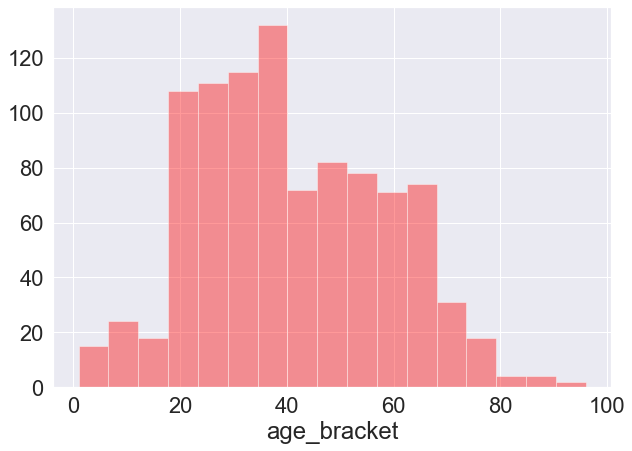

In [661]:
plt.figure(figsize=(10,7))
sns.distplot(data_with_age['age_bracket'],kde=False,color='red')
plt.show()

In [662]:
cat = data_with_age.groupby('current_status')
rec = cat.get_group('Recovered')
dec = cat.get_group('Deceased')
hos = cat.get_group('Hospitalized')

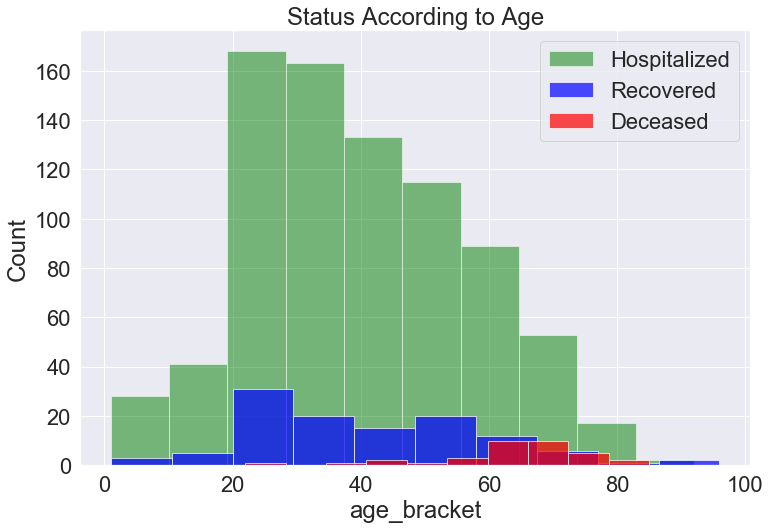

In [663]:
plt.figure(figsize=(12,8))
sns.distplot(hos['age_bracket'],kde=False,color='green',hist_kws=dict(alpha=0.5),bins=10)
sns.distplot(rec['age_bracket'],kde=False,color='blue',hist_kws=dict(alpha=0.7),bins=10)
sns.distplot(dec['age_bracket'],kde=False,color='red',hist_kws=dict(alpha=0.7),bins=10)

plt.legend(['Hospitalized','Recovered','Deceased'])
plt.ylabel('Count')
plt.title('Status According to Age')
plt.show()

In [664]:
data_with_age.isna().sum()

date_announced           0
age_bracket              0
gender                  38
detected_district        0
state_code               0
type_of_transmission    18
status_change_date       2
current_status           0
dtype: int64

In [665]:
target = data_with_age['current_status']

In [666]:
target = pd.factorize(target)

In [667]:
# target

In [668]:
target_definitions = target[1]

In [669]:
target = target[0]

In [670]:
data_with_age['Target'] = target

In [671]:
data_with_age.reset_index()
data_with_age.head(10)

,date_announced,age_bracket,gender,detected_district,state_code,type_of_transmission,status_change_date,current_status,Target
0,2020-01-30,20,F,Thrissur,KL,Imported,2020-02-14,Recovered,0
1,2020-02-03,45,M,East Delhi,DL,Imported,2020-03-15,Recovered,0
2,2020-02-03,24,M,Hyderabad,TG,Imported,2020-02-03,Recovered,0
3,2020-03-03,69,M,Italians*,RJ,Imported,2020-03-03,Recovered,0
4,2020-04-03,55,NaN,Italians*,HR,Imported,2020-03-29,Recovered,0
5,2020-04-03,55,NaN,Italians*,HR,Imported,2020-03-29,Recovered,0
6,2020-04-03,55,NaN,Italians*,HR,Imported,2020-03-29,Recovered,0
7,2020-04-03,55,NaN,Italians*,HR,Imported,2020-03-29,Recovered,0
8,2020-04-03,55,NaN,Italians*,HR,Imported,2020-03-29,Recovered,0
9,2020-04-03,55,NaN,Italians*,HR,Imported,2020-03-29,Recovered,0


In [672]:
data_with_age.type_of_transmission.value_counts()

Local        544
Imported     357
TBD           37
Imported       2
Unknown        1
Name: type_of_transmission, dtype: int64

In [673]:
dummies = pd.get_dummies(data_with_age['type_of_transmission'],drop_first=True,prefix="transmission_type_")

In [674]:
dummies1 = pd.get_dummies(data_with_age['gender'],drop_first=True,prefix = 'gender')

In [675]:
dummies2 = pd.get_dummies(data_with_age['state_code'],drop_first=True,prefix='state_code_')

In [676]:
new_data=pd.concat([data_with_age[['age_bracket']], dummies,dummies1],axis=1)

In [677]:
new_data.reset_index()
data_with_age.reset_index()
new_data.head()

,age_bracket,transmission_type__Imported,transmission_type__Local,transmission_type__TBD,transmission_type__Unknown,gender_M
0,20,0,0,0,0,0
1,45,0,0,0,0,1
2,24,0,0,0,0,1
3,69,0,0,0,0,1
4,55,0,0,0,0,0


In [678]:
# diff = np.subtract(data_with_age['status_change_date'],data_with_age['date_announced'])

In [679]:
y = data_with_age['Target']

In [680]:
X = new_data

In [681]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

## Random Forest Classifier

In [682]:
from sklearn.ensemble import RandomForestClassifier

In [683]:
rfc = RandomForestClassifier(n_estimators=300,random_state=2)

In [684]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [685]:
y_pred = rfc.predict(X_test)

In [686]:
print("Accuracy : {:.2f} %".format(accuracy_score(y_pred,y_test)*100))

Accuracy : 80.73 %


In [687]:
pd.crosstab(y_pred,y_test,rownames=['Actual'],colnames=['Predicted'])

Predicted,0,1,2
Actual,,,
0,2,6,0
1,19,152,7
2,3,2,1


## Using Cross Validation

In [688]:
from sklearn.model_selection import cross_val_score

In [689]:
scores = cross_val_score(rfc,X,y,cv=10)

In [690]:
print("Maximum Accuracy = {:.2f} %".format(max(scores*100)))

Maximum Accuracy = 83.33 %


### If we include the dummies of states

In [691]:
new_data1=pd.concat([data_with_age[['age_bracket']], dummies,dummies1,dummies2],axis=1)

In [692]:
new_data1.reset_index()

,index,age_bracket,transmission_type__Imported,transmission_type__Local,transmission_type__TBD,transmission_type__Unknown,gender_M,state_code__AP,state_code__BR,state_code__CH,...,state_code__MZ,state_code__OR,state_code__PB,state_code__PY,state_code__RJ,state_code__TG,state_code__TN,state_code__UP,state_code__UT,state_code__WB
0,0,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,45,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,24,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3,69,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4,55,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,959,60,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
955,960,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
956,961,51,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
957,962,47,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [693]:
y = data_with_age['Target']
X = new_data1

In [694]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.2,random_state=2)

In [695]:
rfc1 = RandomForestClassifier(n_estimators=300,random_state=2)

In [696]:
rfc.fit(X_train1,y_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [697]:
y_pred1 = rfc.predict(X_test1)

In [698]:
print("Accuracy : {:.2f} %".format(accuracy_score(y_pred1,y_test1)*100))

Accuracy : 82.81 %


In [699]:
pd.crosstab(y_pred1,y_test1,rownames=['Actual'],colnames=['Predicted'])

Predicted,0,1,2
Actual,,,
0,7,8,0
1,16,151,7
2,1,1,1


## Using cross validation

In [700]:
scores1 = cross_val_score(rfc1,X,y,cv=10)

In [701]:
print("Maximum Accuracy = {:.2f} %".format(max(scores1*100)))

Maximum Accuracy = 88.54 %


# Decision Tree Classifier

In [702]:
from sklearn.tree import DecisionTreeClassifier

In [703]:
dtc = DecisionTreeClassifier()

In [704]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [705]:
y_pred = dtc.predict(X_test)

In [706]:
print("Accuracy : {:.2f} %".format(accuracy_score(y_pred,y_test)*100))

Accuracy : 78.12 %


In [707]:
scores3 = cross_val_score(dtc,X,y,cv=10)

In [708]:
print("Maximum Accuracy = {:.2f} %".format(max(scores3*100)))

Maximum Accuracy = 87.50 %


# AdaBoost

In [709]:
from sklearn.ensemble import AdaBoostClassifier

In [710]:
ad = AdaBoostClassifier(n_estimators=300,random_state=3)

In [711]:
ad.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=300, random_state=3)

In [712]:
y_pred = ad.predict(X_test)

In [713]:
print("Accuracy : {:.2f} %".format(ad.score(X_test,y_test)*100))

Accuracy : 83.85 %


# SVM

In [714]:
from sklearn.svm import SVC

In [715]:
model = SVC(kernel = 'linear')

In [716]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [718]:
print('Accuracy : {:.2f} %'.format(model.score(X_test,y_test)*100))

Accuracy : 83.33 %


## Using Cross validation on SVM

In [719]:
score4 = cross_val_score(model,X,y,cv=10)

In [720]:
print("Maximum Accuracy : {:.2f} %".format(max(score4)*100))

Maximum Accuracy : 86.46 %
